In [1]:
%pylab inline
pylab.style.use('ggplot')
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import requests
URL = 'http://people.sc.fsu.edu/~jburkardt/datasets/regression/x03.txt'
response = requests.get(URL)
text = response.text

In [6]:
columns = ['Index', 'One', 'Age', 'Systolic Blood Pressure']

In [10]:
lines = [line.strip() for line in text.split('\n') if not line.strip().startswith('#')]
data = lines[6:-2]
data = np.array([row.split() for row in data], dtype=np.float)
data[:, 1] = data[:, 1].astype(np.int)

In [12]:
data_df = pd.DataFrame(data=data, columns=columns)
data_df = data_df.rename(columns={name: name.lower().replace(' ', '_') for name in data_df.keys()})

In [14]:
data_pressure = data_df[['age', 'systolic_blood_pressure']]

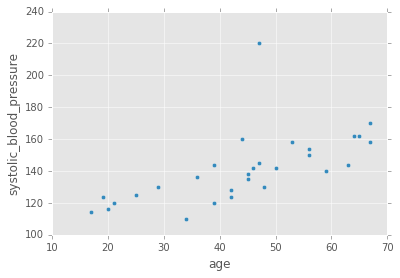

In [15]:
data_pressure.plot(kind='scatter', x='age', y='systolic_blood_pressure')

## Model: systolic_blood_pressure ~ age

In [17]:
import statsmodels.formula.api as sm
result = sm.ols(formula='systolic_blood_pressure ~ age', data=data_df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     systolic_blood_pressure   R-squared:                       0.394
Model:                                 OLS   Adj. R-squared:                  0.372
Method:                      Least Squares   F-statistic:                     17.58
Date:                     Thu, 30 Mar 2017   Prob (F-statistic):           0.000265
Time:                             21:20:47   Log-Likelihood:                -123.16
No. Observations:                       29   AIC:                             250.3
Df Residuals:                           27   BIC:                             253.1
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    100.0359     10.391      9.627      0.000        78.714   121.357
age            0.9338      0.223      4.193      0.000         0.477     1.391
==============================================================================
Omnibus:                       44.232   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.817
Skew:                           2.981   Prob(JB):                     4.08e-44
Kurtosis:                      14.394   Cond. No.                         149.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Removing the Outlier for a Better Model

In [27]:
without_outliers = data_pressure.sort_values(by='systolic_blood_pressure', ascending=False).iloc[1:]

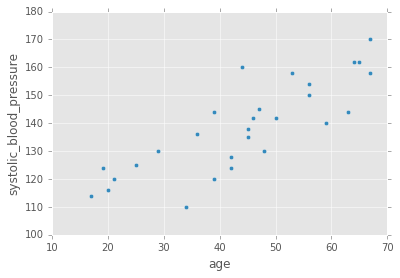

In [28]:
without_outliers.plot(kind='scatter', x='age', y='systolic_blood_pressure')

In [29]:
result = sm.ols(formula='systolic_blood_pressure ~ age', data=without_outliers).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     systolic_blood_pressure   R-squared:                       0.686
Model:                                 OLS   Adj. R-squared:                  0.674
Method:                      Least Squares   F-statistic:                     56.74
Date:                     Thu, 30 Mar 2017   Prob (F-statistic):           5.37e-08
Time:                             21:37:36   Log-Likelihood:                -101.41
No. Observations:                       28   AIC:                             206.8
Df Residuals:                           26   BIC:                             209.5
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     98.8335      5.571     17.741      0.000        87.382   110.285
age            0.8996      0.119      7.532      0.000         0.654     1.145
==============================================================================
Omnibus:                        0.199   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.905   Jarque-Bera (JB):                0.094
Skew:                          -0.122   Prob(JB):                        0.954
Kurtosis:                       2.852   Cond. No.                         146.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""